In [25]:
%config Completer.use_jedi = False
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from roblib import *

<IPython.core.display.Javascript object>


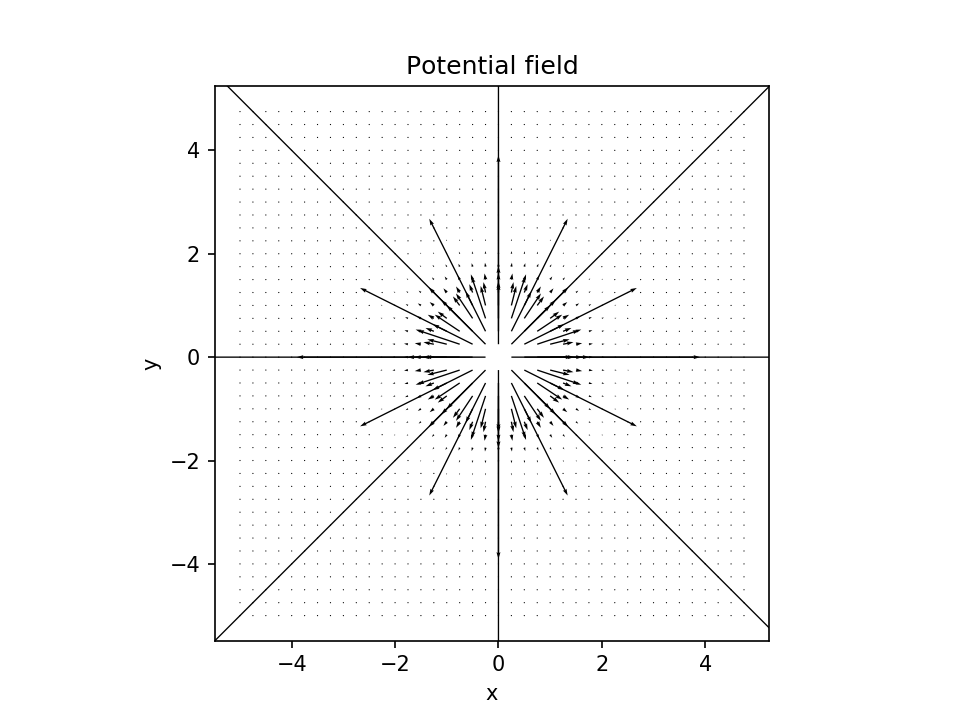

/home/cidn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [40]:
rep_line = lambda x,y : (1*x,0*y)#/sqrt(x**2+y**2)
rep_exp_vg = lambda x,y,x0 : (np.exp(-x+x0),0*y)
rep_exp_vd = lambda x,y,x0 : (-np.exp(x-x0),0*y)
rep_exp_hg = lambda x,y,y0 : (0*x,np.exp(-y+y0))
rep_exp_hd = lambda x,y,y0 : (0*x,-np.exp(y-y0))

rep_pt = lambda x,y,x0,y0 : (2*(x-x0)/np.power(np.power(x-x0,2)+np.power(y-y0,2),2),2*(y-y0)/np.power(np.power(x-x0,2)+np.power(y-y0,2),2))

r_line = lambda x,y : rep_line(x,y)

attract_pt = lambda x,y,x0,y0 : (-x+x0,-y+y0)/sqrt((x-x0)**2+(y-y0)**2)
attract_line_v = lambda x,y,x0 : (-x+x0,0)#/sqrt((x-x0)**2+(y-y0)**2) 
attract_line_h = lambda x,y,y0 : (0,-y+y0)#/sqrt((x-x0)**2+(y-y0)**2) 

def combi(x,y,foo_array):
    res = [0,0]
    
    for foo in foo_array:  
        T1 = foo(x,y)
        res[0] += T1[0]
        res[1] += T1[1]
        
    return res

a_line_v1 = lambda x,y : attract_line_v(x,y,2)
a_line_v2 = lambda x,y : attract_line_v(x,y,-2)

r_exp_v1 = lambda x,y : rep_exp_vd(x,y,1)
r_exp_v2 = lambda x,y : rep_exp_vg(x,y,-1)

r_exp_v3 = lambda x,y : rep_exp_hg(x,y,0)
r_exp_v4 = lambda x,y : rep_exp_hd(x,y,0)

r_pt_1 = lambda x,y : rep_pt(x,y,0,0)

mul = lambda x,y : combi(x,y,[r_exp_v1,r_exp_v2,r_exp_v3,r_exp_v4,r_pt_1])
mul = lambda x,y : combi(x,y,[r_pt_1])

lim = 5
step = lim/20
fig, ax = plt.subplots()

X1,X2 = meshgrid(arange(-lim,lim,step),arange(-lim,lim,step))
VX,VY = mul(X1,X2)

ax.quiver(Mx,My,VX,VY)
ax.set_aspect(1)
ax.set_title("Potential field")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()